In [12]:
# To reload when the files change
from support_mvp.backup_plot_diagram.plot_diagram_schrock import *
import sys
import importlib
import matplotlib.pyplot as plt
importlib.reload(sys.modules['support_mvp.backup_plot_diagram'])

<module 'support_mvp.backup_plot_diagram' from '/home/magstr/opt/support_mvp/support_mvp/backup_plot_diagram/__init__.py'>

In [13]:
# Adjust troublesome values
# compare_data['b3lyp_candidate']['Mo_N'] = 0

cmap = cm.get_cmap("tab10")
# colors = cmap.colors
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['k','#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ["k", "#00429d", "0.80"]  # Could also use the color generator above


cmap = cm.get_cmap("tab20")
colors=cmap.colors
colors = ['k',colors[4]]

# Get the reference energy dicts.
dicts = read_parts()

oneup


In [14]:
#plt.rcParams["axes.labelsize"] = 30
#plt.rcParams["axes.fontsize"] = 30

### Functions

In [15]:
def draw_mol(
    mol,
    width=900,
    height=900,
    Hs=False,
    confId=-1,
    multipleConfs=False,
    atomlabel=False,
    hit_ats=None,
    gen_struct=None,
    trajectory=False,
):
    n_cores = options.pop("n_cores")
    p = py3Dmol.view(width=width, height=height)
    
    if isinstance(mol, str):
        xyz_f = open(mol)
        line = xyz_f.read()
        xyz_f.close()
        p.addModel(line, "xyz")
    else:
        if multipleConfs:
            for conf in mol.GetConformers():
                mb = Chem.MolToMolBlock(mol, confId=conf.GetId())
                p.addModel(mb, "sdf")
        else:
            mb = Chem.MolToMolBlock(mol)
            p.addModel(mb, "sdf")
        
    p.setStyle({"stick": {"radius": 0.2}, "sphere":
                {"radius": 0.3}})
    if atomlabel:
        p.addPropertyLabels("index")  # ,{'elem':'H'}
    p.zoomTo()
    p.update()

In [16]:
dict_key = 'parts_orca_b3lyp_sp'

### Plot b3lyp comparison with reference

In [17]:
plt.rcParams.update({'font.size': 22, "axes.labelsize":24})

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661


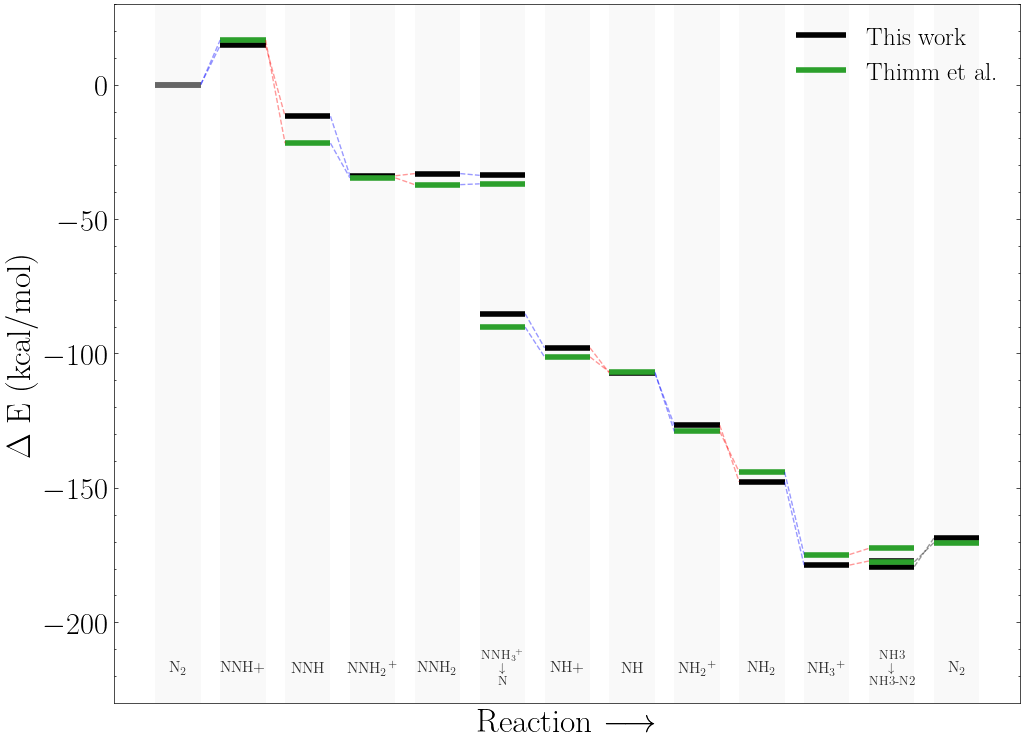

In [18]:

#dict_key2 = "parts_radius_pbe_nogeo_def2"
options = {
    "title": f"",
    "ylim": [-230, 30],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/deltaE.pdf",
    "legend": ["This work", "Thimm et al."],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data  = get_diagram_dicts(options)

compare_data["pbe_paper"] = collection["paper_b3lyp_diagram"]

plot_diagrams(compare_data, options)

### Plot B3LYP comparison with xtb correction

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol


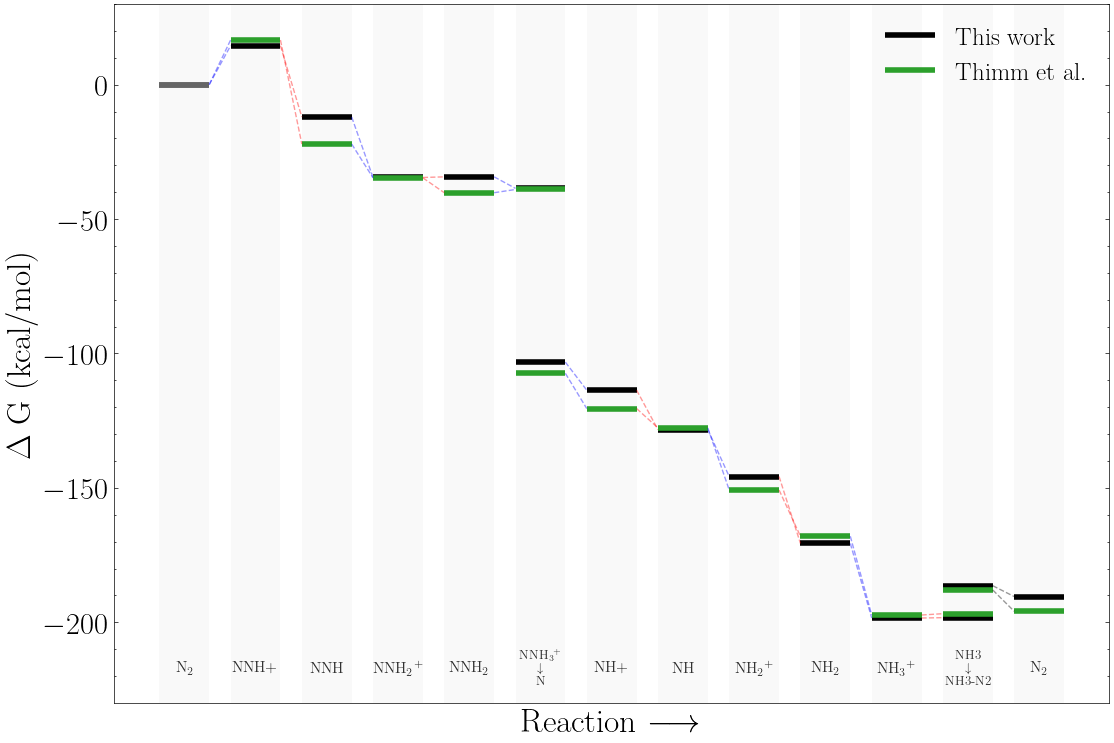

In [19]:
#dict_key2 = "parts_radius_pbe_nogeo_def2"
options = {
    "title": f"",
    "ylim": [-230, 30],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/deltaG_xtbvib.pdf",
    "legend": ["This work", "Thimm et al."],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data= get_diagram_dicts(options)

compare_data["pbe_paper"] = collection["paper_b3lyp_diagram_G"]

plot_diagrams(compare_data, options)

In [20]:
elem = 'b3lyp_sp'

In [21]:
print('exchangwe',compare_data[elem]['Mo_N2_exchange']-compare_data[elem]['Mo_NH3'])
print('binding',compare_data[elem]['Mo_N2_NH3']-compare_data[elem]['Mo_NH3'])
print('plus',compare_data[elem]['Mo_NH3']-compare_data[elem]['Mo_NH3+'])

exchangwe 7.8618315573735345
binding 11.87837322520295
plus 0.12956803309299403


# CandidatesCandidate

## Candidate 1

###  Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N
NH3->N2 : -9.27844085264951
NH3->N2_NH3 : 3.490633698645979
NH3+->NH3 : 9.894694034010172
lol


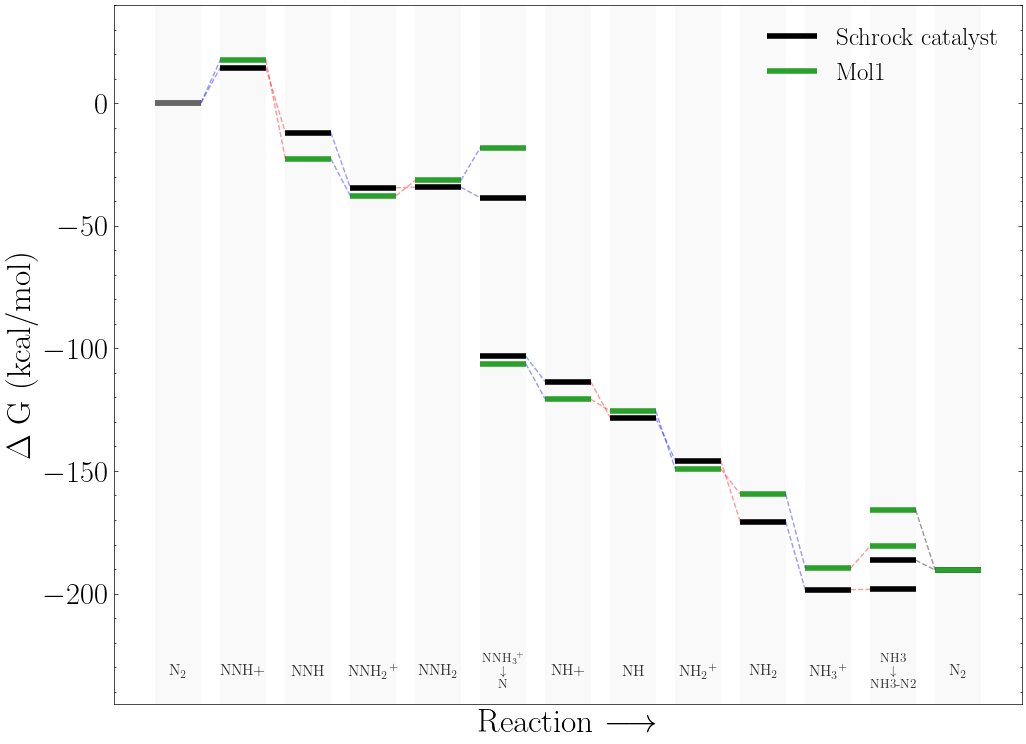

In [22]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate1_thermal.pdf",
    "legend": ["Schrock catalyst","Mol1"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/C=C(C)CC(C)(C)N")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

In [23]:
elem ='C=C(C)CC(C)(C)N'
print(compare_data[elem]['Mo_N2_exchange']-compare_data[elem]['Mo_NH3'])
print(compare_data[elem]['Mo_N2_NH3']-compare_data[elem]['Mo_NH3'])
print(compare_data[elem]['Mo_NH3']-compare_data[elem]['Mo_NH3+'])

-9.796603627594493
14.680539315950796
8.929015183288527


### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N
NH3->N2 : -9.27844085264951
NH3->N2_NH3 : 3.490633698645979
NH3+->NH3 : 9.894694034010172


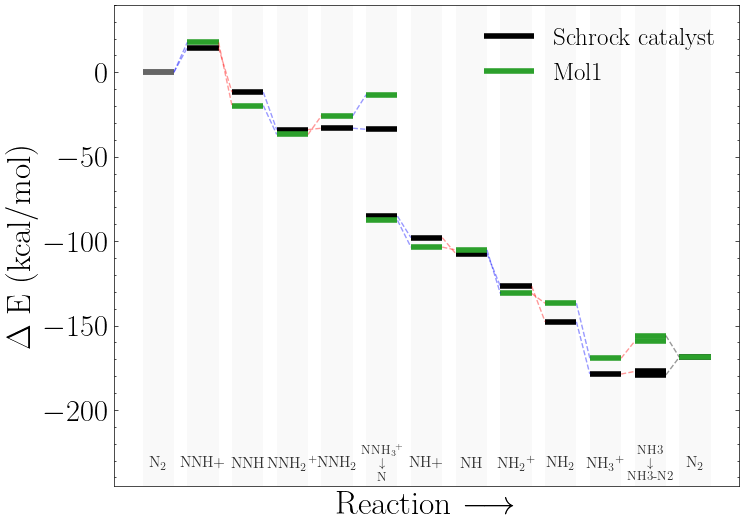

In [24]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate1.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

In [25]:
compare_data,g = get_diagram_dicts_return_gibbs(options)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N
NH3->N2 : -9.27844085264951
NH3->N2_NH3 : 3.490633698645979
NH3+->NH3 : 9.894694034010172


In [26]:
print(compare_data['C=C(C)CC(C)(C)N']['Mo_N2_exchange']-compare_data['C=C(C)CC(C)(C)N']['Mo_NH3'])

-9.27844085264951


In [27]:
g

{'Mo_NNH+': 17.749630972801242,
 'Mo_NNH': -37.41172140231356,
 'Mo_NNH2+': -17.119148631987628,
 'Mo_NNH2': 11.082818197086453,
 'Mo_NNH3+': 12.487575432343874,
 'Mo_N': -74.48325198702514,
 'Mo_NH+': -15.832962705695536,
 'Mo_NH': -1.637902155984193,
 'Mo_NH2+': -25.829154286941048,
 'Mo_NH2': -5.772062129806727,
 'Mo_NH3+': -32.56888744136086,
 'Mo_NH3': 9.894694034010172,
 'Mo_N2_NH3': 3.490633698645979,
 'Mo': 11.067746331449598,
 'Mo_N2_bare': -20.346187184099108,
 'Mo_N2_exchange': -12.769074551295489}

In [28]:
g

{'Mo_NNH+': 17.749630972801242,
 'Mo_NNH': -37.41172140231356,
 'Mo_NNH2+': -17.119148631987628,
 'Mo_NNH2': 11.082818197086453,
 'Mo_NNH3+': 12.487575432343874,
 'Mo_N': -74.48325198702514,
 'Mo_NH+': -15.832962705695536,
 'Mo_NH': -1.637902155984193,
 'Mo_NH2+': -25.829154286941048,
 'Mo_NH2': -5.772062129806727,
 'Mo_NH3+': -32.56888744136086,
 'Mo_NH3': 9.894694034010172,
 'Mo_N2_NH3': 3.490633698645979,
 'Mo': 11.067746331449598,
 'Mo_N2_bare': -20.346187184099108,
 'Mo_N2_exchange': -12.769074551295489}

In [29]:
options_ref = {
            "exchange": True,
            "thermal_correction": True,
            'diagrams': [
                [
                    base / "schrock/diagrams_schrock/dft/b3lyp_sp",
                    "orca.out",
                    "FINAL SINGLE",
                    dicts["parts_orca_b3lyp_sp"],
                    Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
                ],
            ]
        }


options_ref = defaultdict(lambda: False, options_ref)
compare_data_ref, delta_gibbs_ref = get_diagram_dicts_return_gibbs(options_ref)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol


In [30]:
delta_gibbs_ref

defaultdict(float,
            {'Mo_NNH+': 14.4792639270635,
             'Mo_NNH': -26.533830887443344,
             'Mo_NNH2+': -22.48481722490814,
             'Mo_NNH2': 0.2413269961469382,
             'Mo_NNH3+': -4.298512326990107,
             'Mo_N': -64.63827494688684,
             'Mo_NH+': -10.422597935844436,
             'Mo_NH': -14.701851947565672,
             'Mo_NH2+': -17.426595593911173,
             'Mo_NH2': -24.895385879313096,
             'Mo_NH3+': -27.732130121747872,
             'Mo_NH3': 0.12956803309299403,
             'Mo_N2_NH3': 11.87837322520295,
             'Mo': 20.637184983014777,
             'Mo_N2_bare': -12.775353425641242,
             'Mo_N2_exchange': -4.016541667829415})

In [31]:
delta_gibbs_ref.pop('Mo_N2_exchange')
delta_gibbs_ref.pop('Mo_N2_bare')
delta_gibbs_ref.pop('Mo')

g.pop('Mo_N2_exchange')
g.pop('Mo_N2_bare')
g.pop('Mo')


# Find step that increased most compared to refference
d3 = {key: g[key] - delta_gibbs_ref.get(key, 0) for key in g}

## Candidate 2

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCc1ncnc2ccccc12
NH3->N2 : -1.972812126390636
NH3->N2_NH3 : 4.720123135019094
NH3+->NH3 : 11.319995245430619
lol


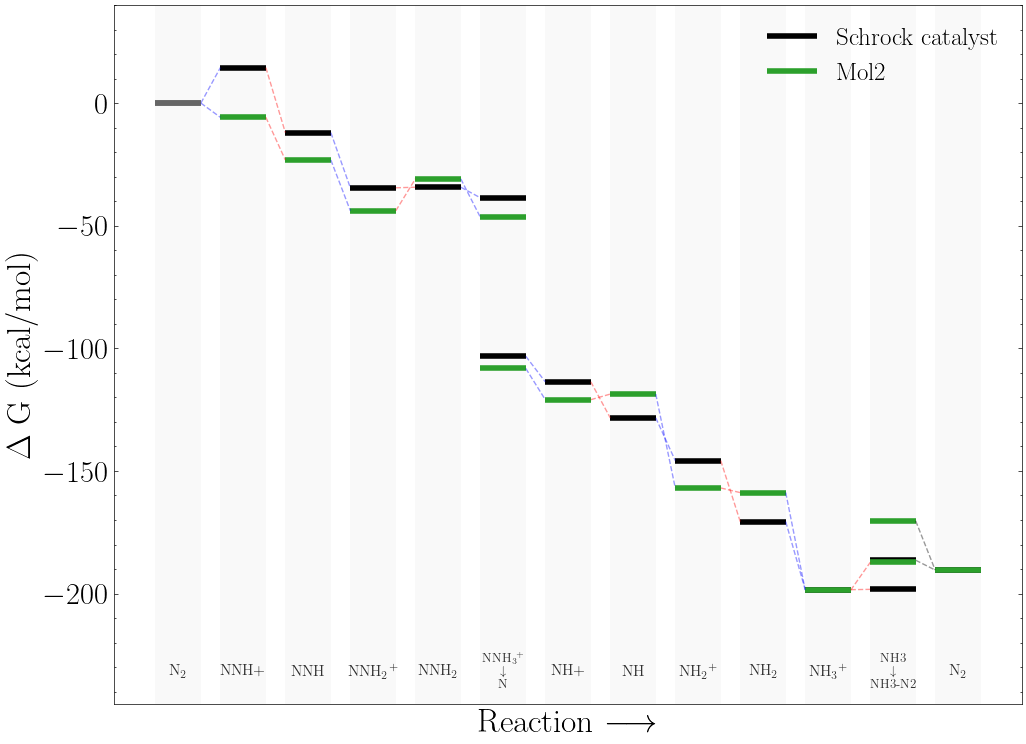

In [32]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate2_thermal.pdf",
    "legend": ["Schrock catalyst","Mol2"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCCc1ncnc2ccccc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCCc1ncnc2ccccc12")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCc1ncnc2ccccc12
NH3->N2 : -1.972812126390636
NH3->N2_NH3 : 4.720123135019094
NH3+->NH3 : 11.319995245430619


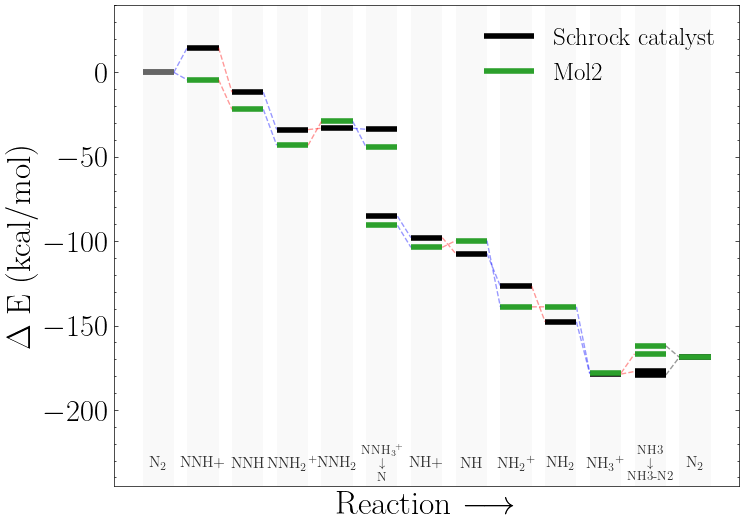

In [33]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate2.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 3

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ncc(C(=O)CO)cc1N
NH3->N2 : -7.442760905250907
NH3->N2_NH3 : -17.65318280365318
NH3+->NH3 : -2.2510269307531416
lol


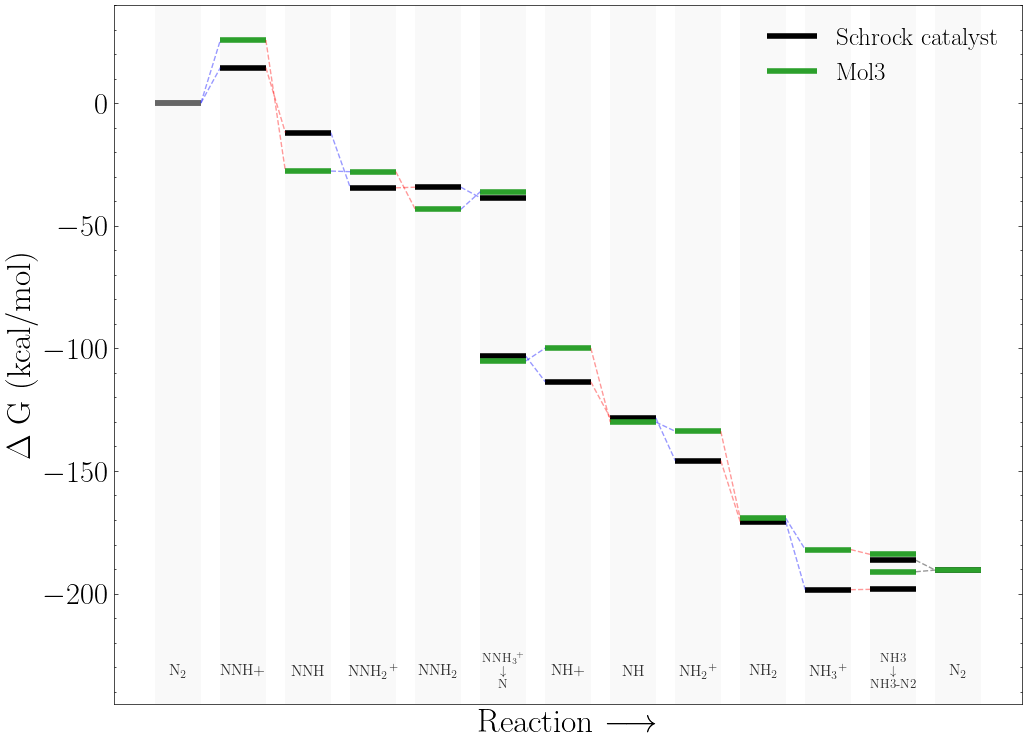

In [34]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate3_thermal.pdf",
    "legend": ["Schrock catalyst","Mol3"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ncc(C(=O)CO)cc1N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1ncc(C(=O)CO)cc1N")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic 

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ncc(C(=O)CO)cc1N
NH3->N2 : -7.442760905250907
NH3->N2_NH3 : -17.65318280365318
NH3+->NH3 : -2.2510269307531416


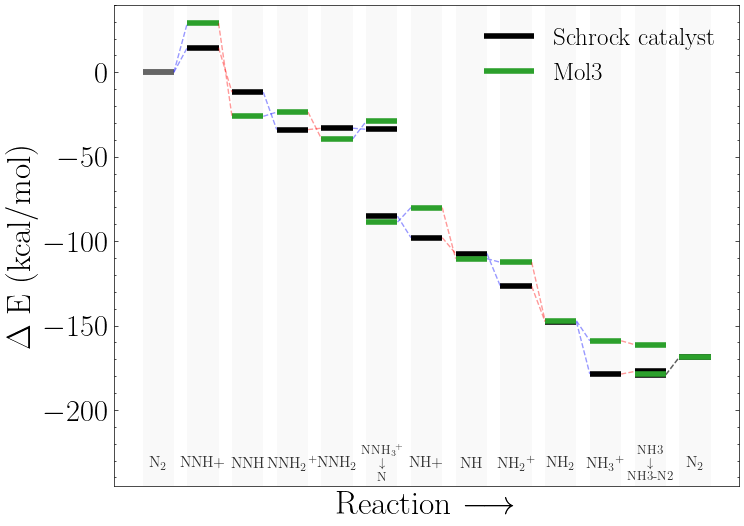

In [35]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate3.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 4

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12
NH3->N2 : -8.283434719778597
NH3->N2_NH3 : -5.719933233689517
NH3+->NH3 : 16.031249658670276
lol


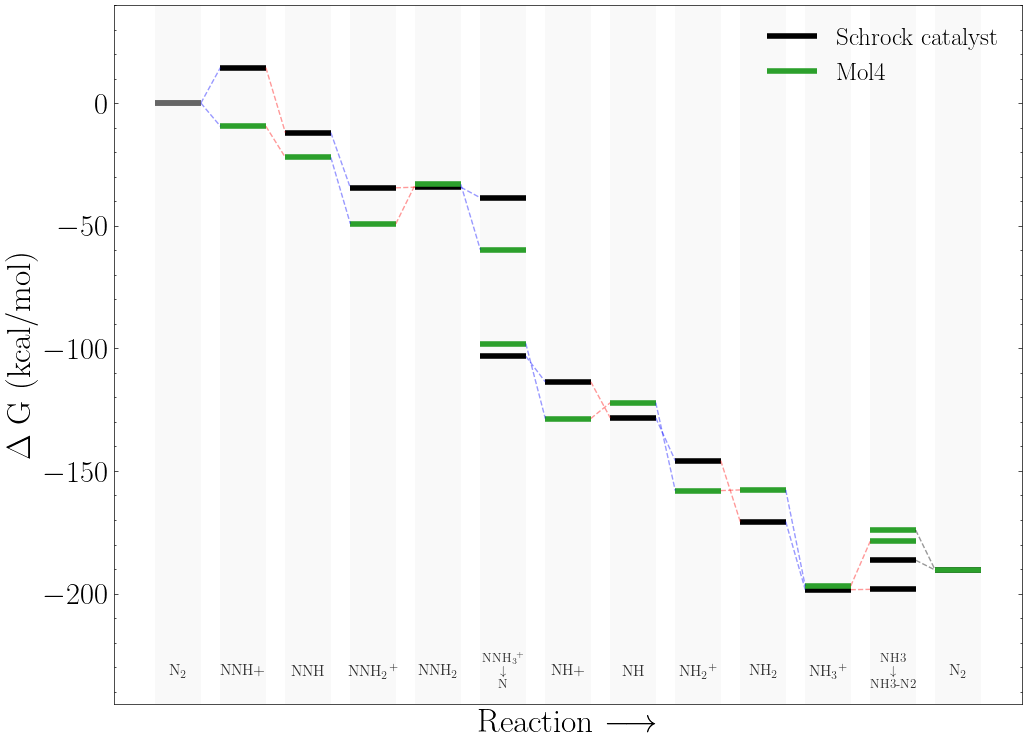

In [36]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate4_thermal.pdf",
    "legend": ["Schrock catalyst","Mol4"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCCCOc1ccnc2cccnc12")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

In [37]:
compare_data = get_diagram_dicts(options)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12
NH3->N2 : -8.283434719778597
NH3->N2_NH3 : -5.719933233689517
NH3+->NH3 : 16.031249658670276
lol


In [38]:
compare_data

{'b3lyp_sp': {'Mo_N2': 0,
  'Mo_NNH+': 14.4792639270635,
  'Mo_NNH': -12.054566960379844,
  'Mo_NNH2+': -34.539384185287986,
  'Mo_NNH2': -34.29805718914105,
  'Mo_NNH3+': -38.596569516131154,
  'Mo_N': -103.23484446301799,
  'Mo_NH+': -113.65744239886243,
  'Mo_NH': -128.3592943464281,
  'Mo_NH2+': -145.78588994033927,
  'Mo_NH2': -170.68127581965237,
  'Mo_NH3+': -198.41340594140024,
  'Mo_NH3': -198.28383790830725,
  'Mo_N2_NH3': -186.4054646831043,
  'Mo': -177.64665292529247,
  'Mo_N2_bare': -190.4220063509337,
  'Mo_N2_exchange': -190.4220063509337},
 'NCCCOc1ccnc2cccnc12': {'Mo_N2': 0,
  'Mo_NNH+': -9.447683967938843,
  'Mo_NNH': -22.15461221305938,
  'Mo_NNH2+': -49.21372318886148,
  'Mo_NNH2': -33.12327077194544,
  'Mo_NNH3+': -59.76481656522995,
  'Mo_N': -98.04387163103317,
  'Mo_NH+': -128.6203866090229,
  'Mo_NH': -122.17828469834382,
  'Mo_NH2+': -158.0085937388939,
  'Mo_NH2': -157.7361616417002,
  'Mo_NH3+': -196.91480228112943,
  'Mo_NH3': -178.68191757573834,
  'Mo_N2

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12
NH3->N2 : -8.283434719778597
NH3->N2_NH3 : -5.719933233689517
NH3+->NH3 : 16.031249658670276


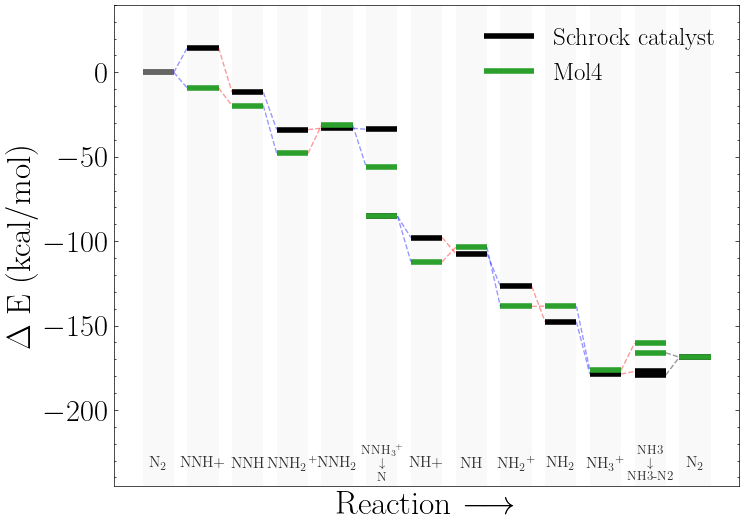

In [39]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate4.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Canidate 5

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(Cc2ccccc2)cc1
NH3->N2 : -13.84582714131102
NH3->N2_NH3 : 6.152772002853453
NH3+->NH3 : 12.423572551459074
lol


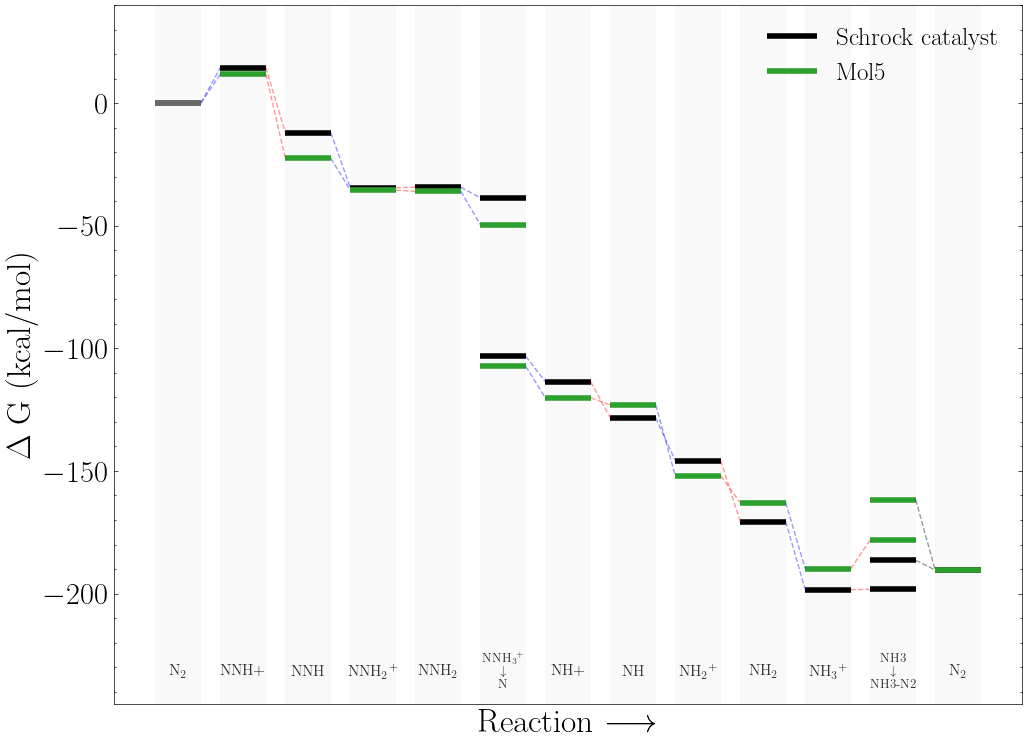

In [40]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate5_thermal.pdf",
    "legend": ["Schrock catalyst","Mol5"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(Cc2ccccc2)cc1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(N)Cc1ccc(Cc2ccccc2)cc1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(Cc2ccccc2)cc1
NH3->N2 : -13.84582714131102
NH3->N2_NH3 : 6.152772002853453
NH3+->NH3 : 12.423572551459074


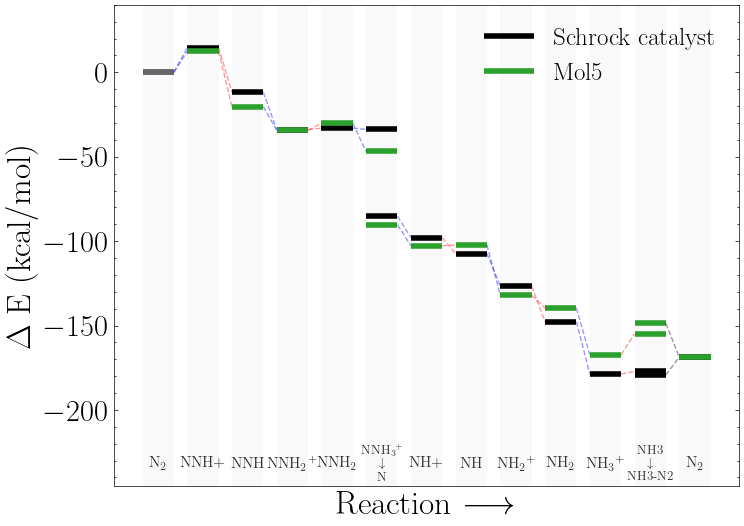

In [41]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate5.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 6

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1
NH3->N2 : -13.96567478775978
NH3->N2_NH3 : 1.7728243041783571
NH3+->NH3 : 10.334147303830832
lol


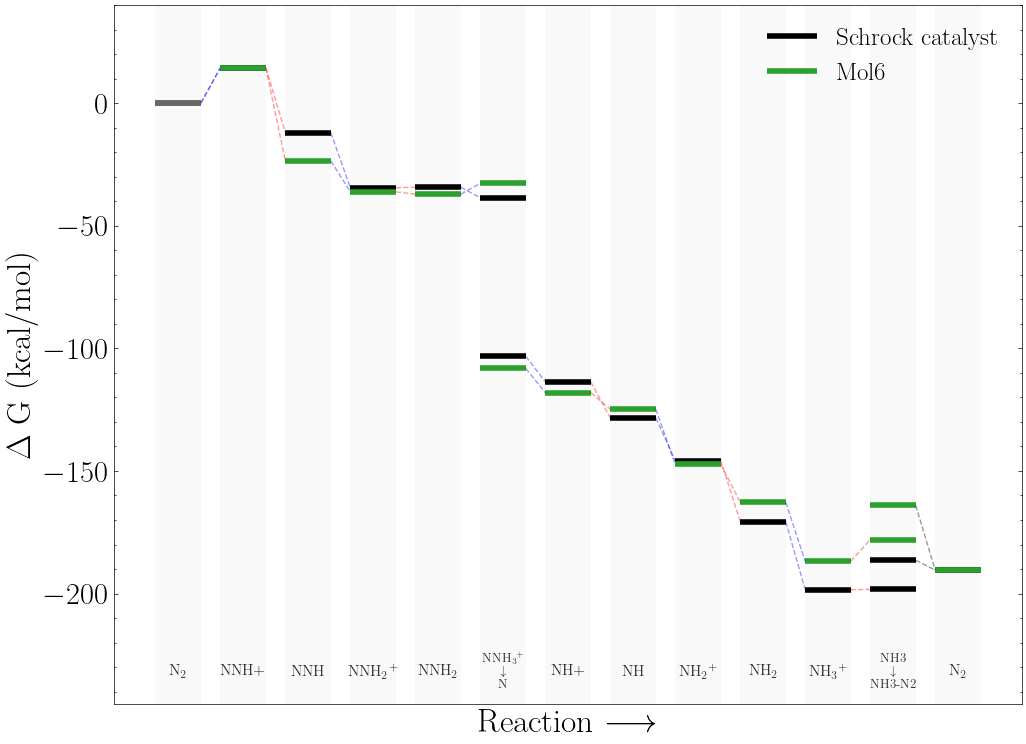

In [42]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate6_thermal.pdf",
    "legend": ["Schrock catalyst","Mol6"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(C)(N)CCC1CCCCC1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1
NH3->N2 : -13.96567478775978
NH3->N2_NH3 : 1.7728243041783571
NH3+->NH3 : 10.334147303830832


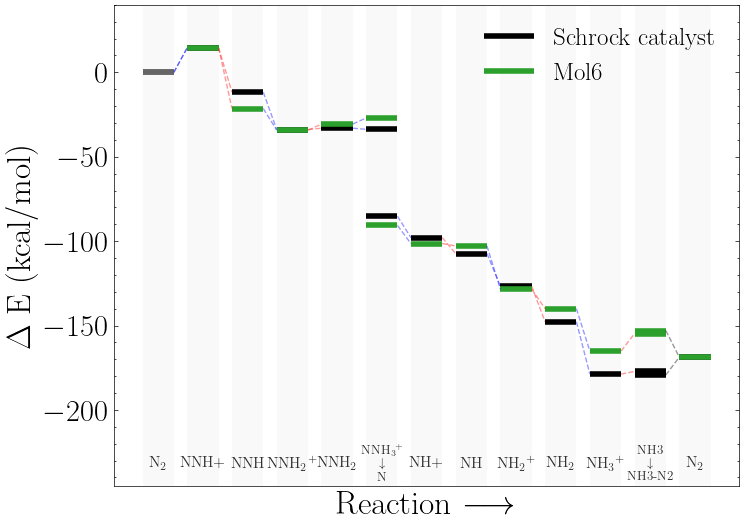

In [43]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate6.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 7

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(CCl)cc1
NH3->N2 : -11.315778146032244
NH3->N2_NH3 : 3.515264156740159
NH3+->NH3 : 12.142576272599399
lol


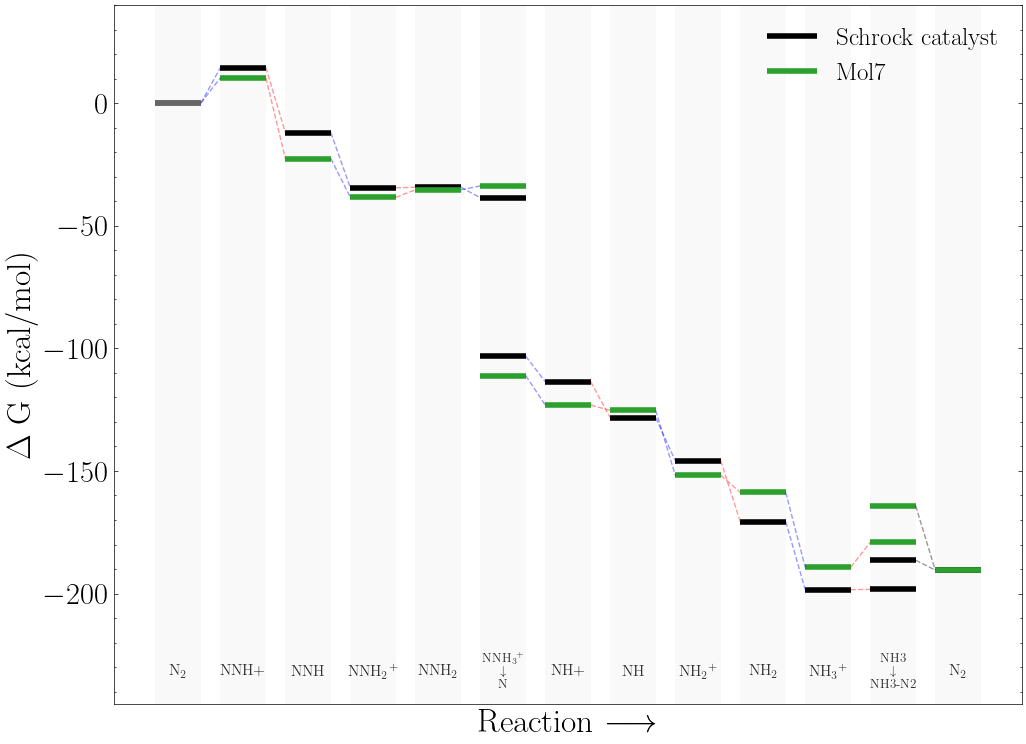

In [44]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate7_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol7"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(CCl)cc1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(N)Cc1ccc(CCl)cc1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(CCl)cc1
NH3->N2 : -11.315778146032244
NH3->N2_NH3 : 3.515264156740159
NH3+->NH3 : 12.142576272599399


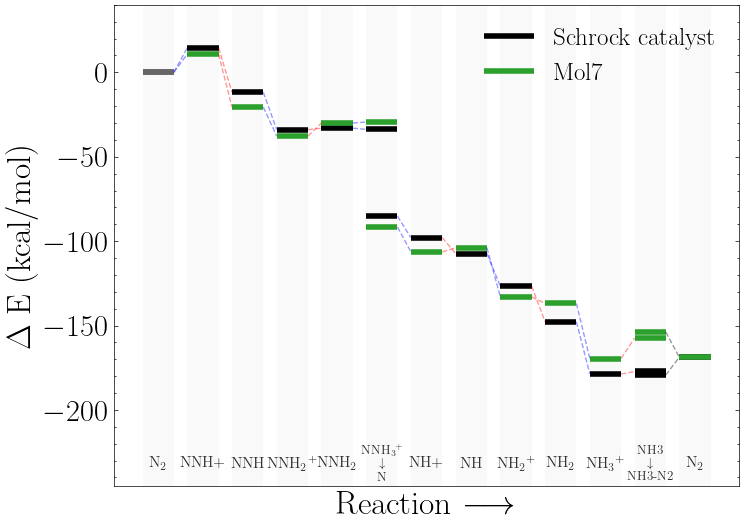

In [45]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate7.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 8

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1cnc(C#N)c(N)c1
NH3->N2 : 27.735363428946584
NH3->N2_NH3 : 11.178820024244487
NH3+->NH3 : -22.416826225351542
lol


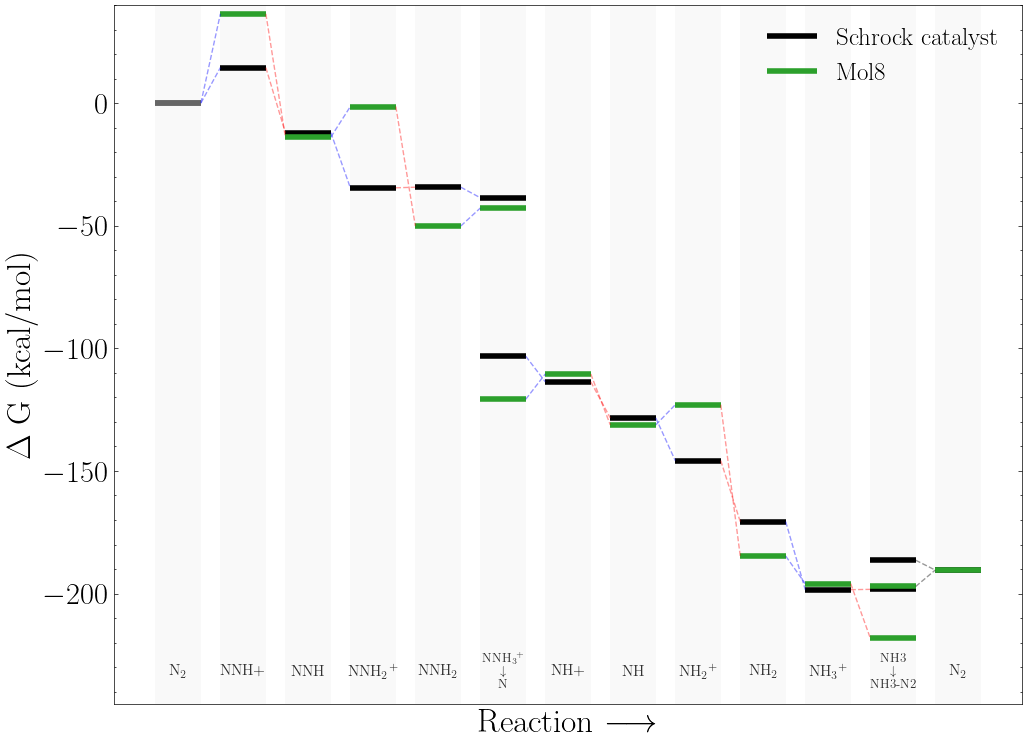

In [46]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate8_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol8"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1cnc(C#N)c(N)c1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1cnc(C#N)c(N)c1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1cnc(C#N)c(N)c1
NH3->N2 : 27.735363428946584
NH3->N2_NH3 : 11.178820024244487
NH3+->NH3 : -22.416826225351542


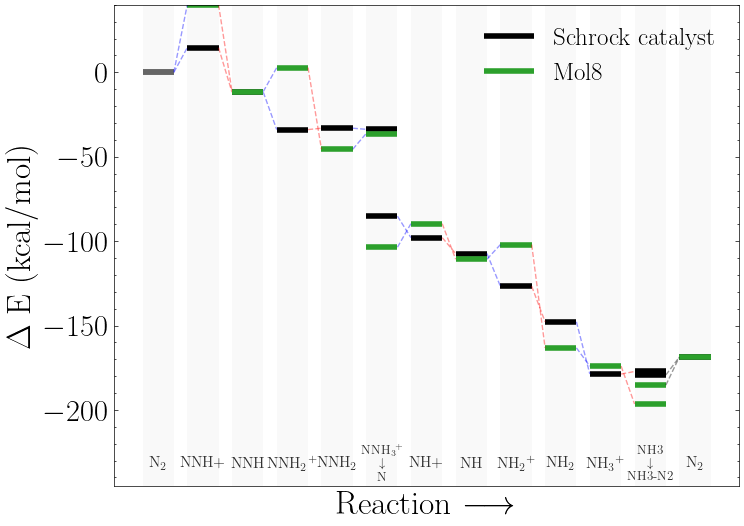

In [47]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate8.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 9

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C#N)c1N
NH3->N2 : -19.67271357541904
NH3->N2_NH3 : -19.407682033255696
NH3+->NH3 : 5.225624382030219
lol


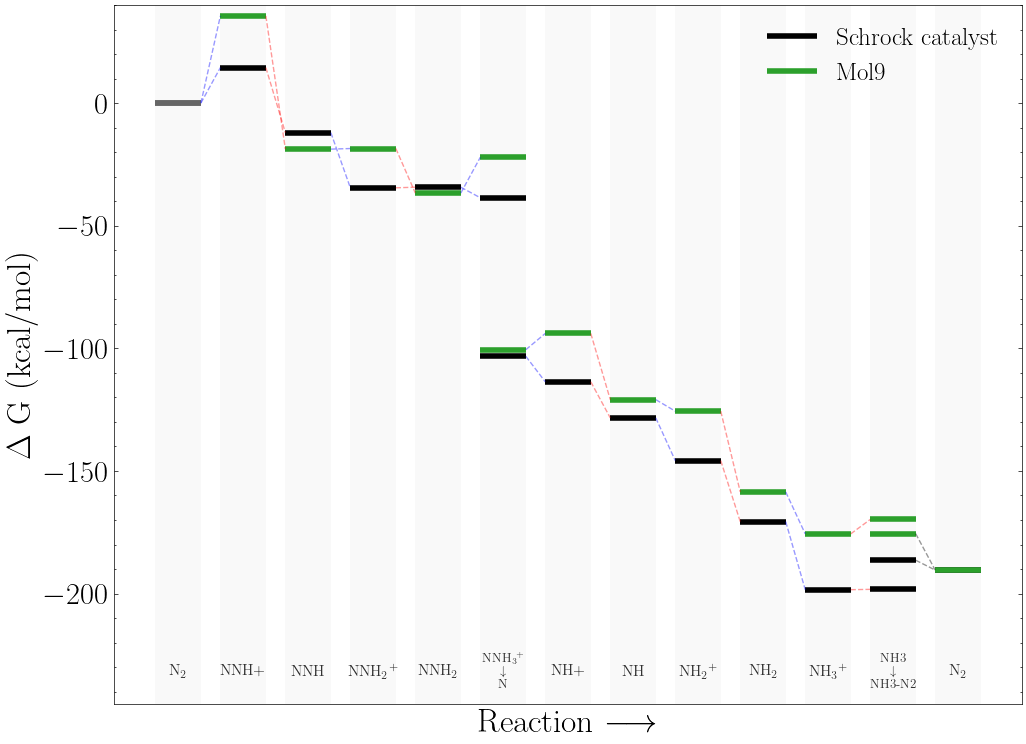

In [48]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate9_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol9"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C#N)c1N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1ccnc(C#N)c1N")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C#N)c1N
NH3->N2 : -19.67271357541904
NH3->N2_NH3 : -19.407682033255696
NH3+->NH3 : 5.225624382030219


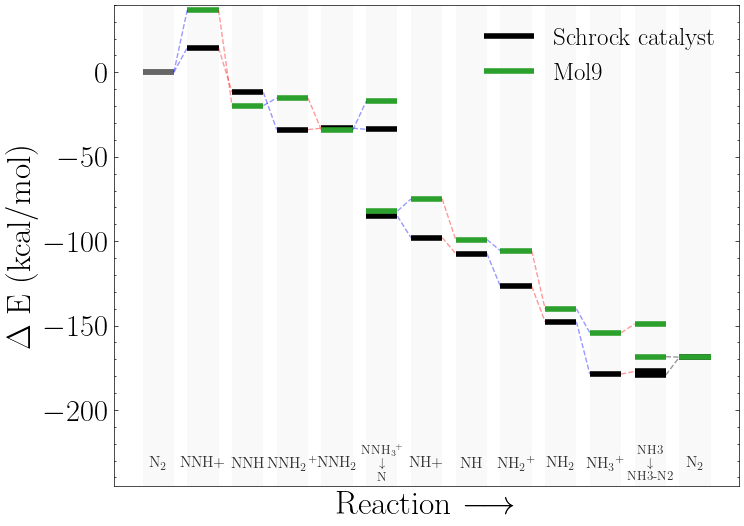

In [49]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate9.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 10

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C(=O)Cl)c1N
NH3->N2 : -5.6330751813948154
NH3->N2_NH3 : -2.417197547852993
NH3+->NH3 : -8.694264298770577
lol


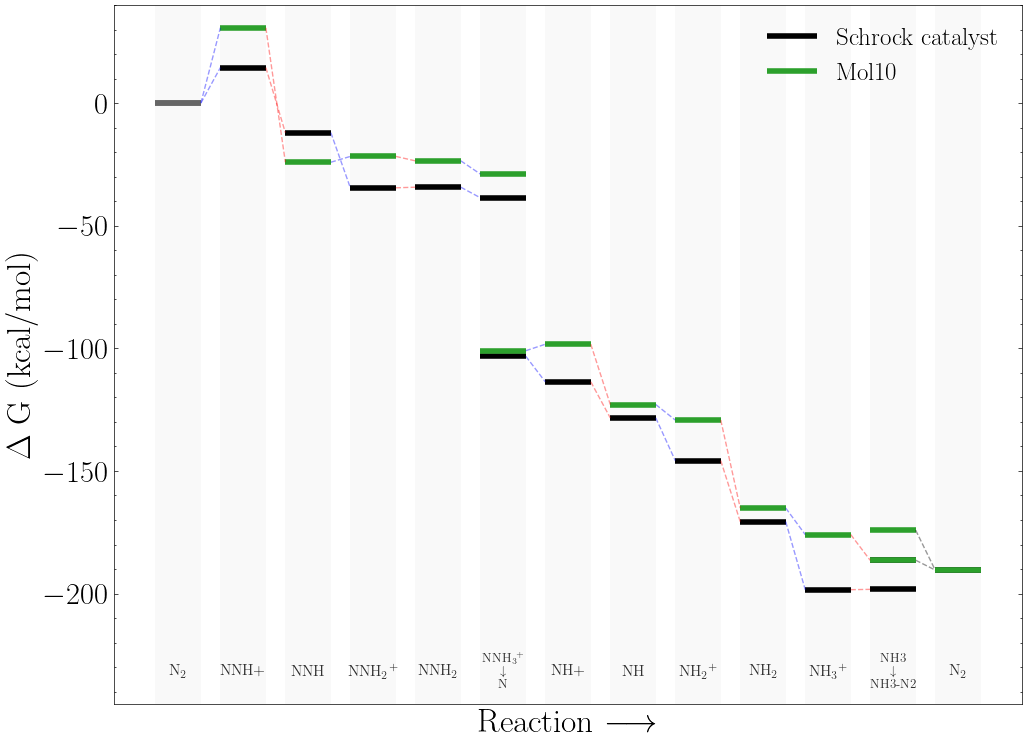

In [53]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate10_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol10"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C(=O)Cl)c1N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1ccnc(C(=O)Cl)c1N")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C(=O)Cl)c1N
NH3->N2 : -5.6330751813948154
NH3->N2_NH3 : -2.417197547852993
NH3+->NH3 : -8.694264298770577


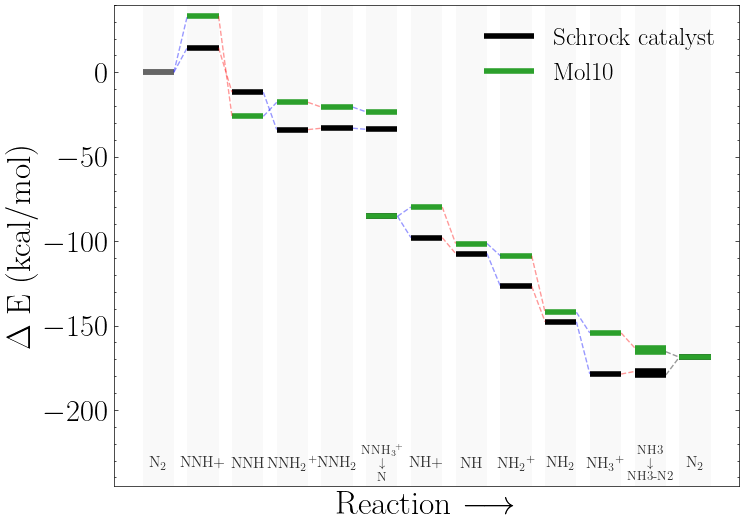

In [51]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate10.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 11

In [52]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate11_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol11"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CCCOC(=O)NCC1(N)CCCCC1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CCCOC(=O)NCC1(N)CCCCC1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CCCOC(=O)NCC1(N)CCCCC1
NH3->N2 : -1.2531480826437473
NH3->N2_NH3 : 13.00312846712768
NH3+->NH3 : 9.074571898207068


TypeError: 'NoneType' object is not subscriptable

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CCCOC(=O)NCC1(N)CCCCC1
NH3->N2 : -1.2531480826437473
NH3->N2_NH3 : 13.00312846712768
NH3+->NH3 : 9.074571898207068


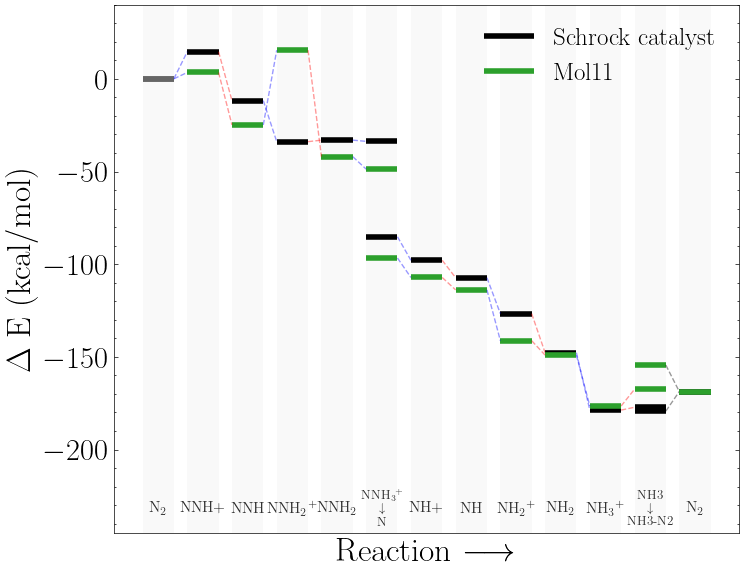

In [42]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate11.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 12

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCOC(=O)c1ncnc2ccccc12
NH3->N2 : 10.726872190833092
NH3->N2_NH3 : -6.779782804660499
NH3+->NH3 : -15.030039471574128
lol


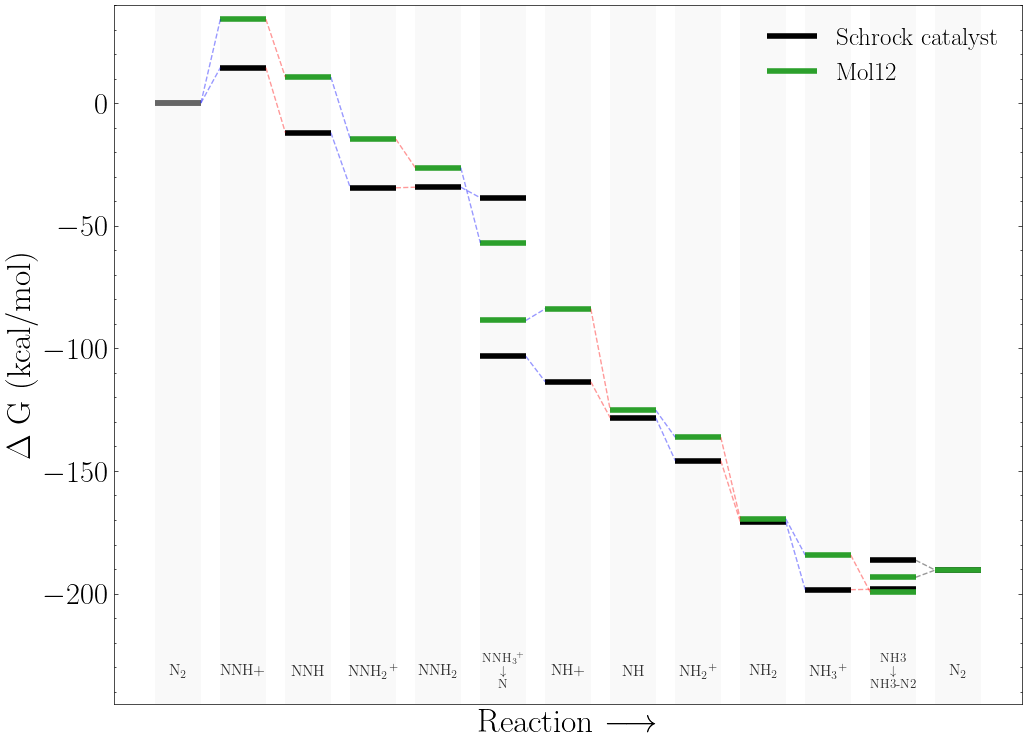

In [43]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate12_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol12"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCCOC(=O)c1ncnc2ccccc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCCOC(=O)c1ncnc2ccccc12")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCOC(=O)c1ncnc2ccccc12
NH3->N2 : 10.726872190833092
NH3->N2_NH3 : -6.779782804660499
NH3+->NH3 : -15.030039471574128


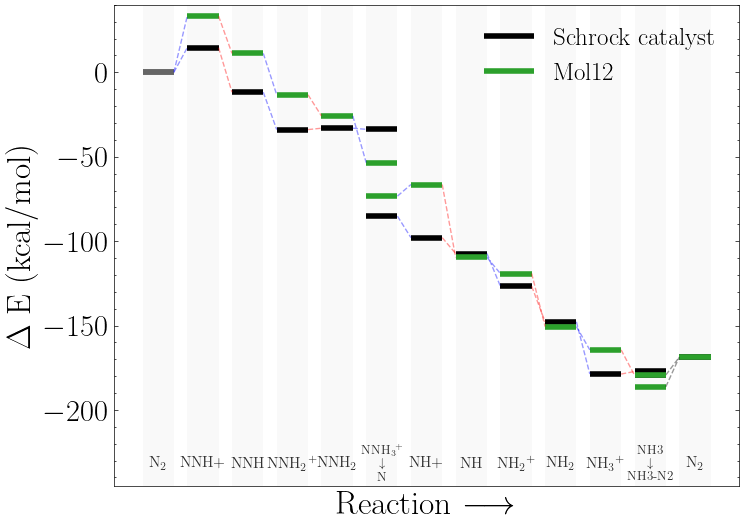

In [44]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate12.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 13

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCC=Cc1ncnc2ccccc12
NH3->N2 : 3.106401869095862
NH3->N2_NH3 : -3.8553858874365687
NH3+->NH3 : 10.802981940098107
lol


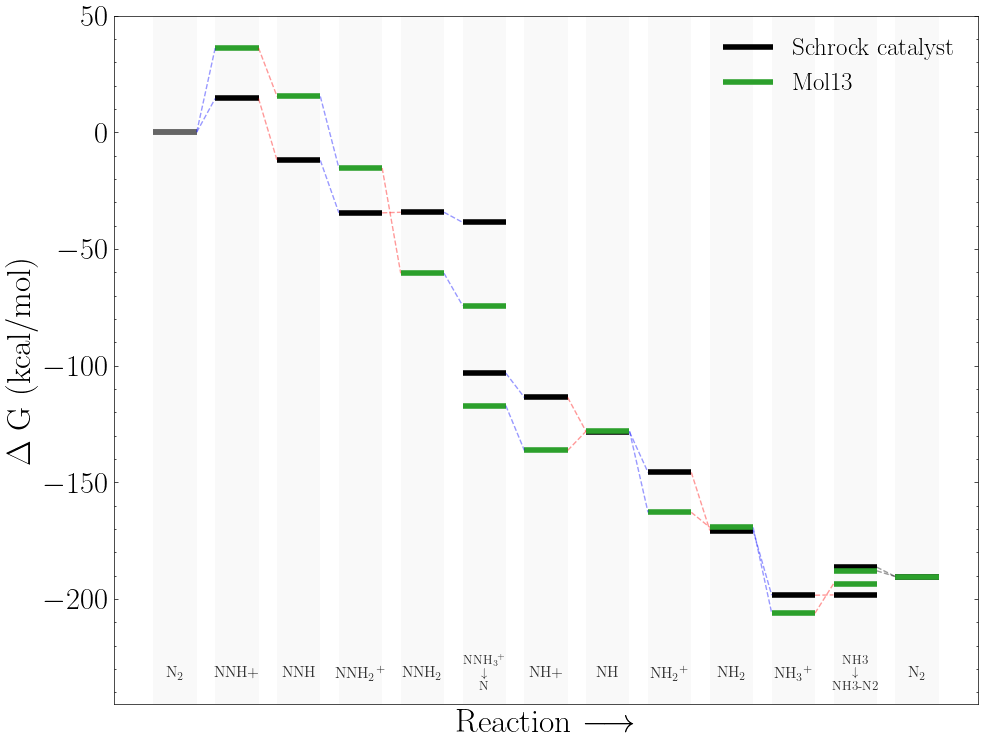

In [45]:
options = {
    "title": f"",
    "ylim": [-245, 50],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate13_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol13"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCC=Cc1ncnc2ccccc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCC=Cc1ncnc2ccccc12")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

## Molecules for paper

In [ ]:
CC(C)(N)CCC1CCCCC1

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1
NH3->N2 : -13.96567478775978
NH3->N2_NH3 : 1.7728243041783571
NH3+->NH3 : 10.334147303830832
lol


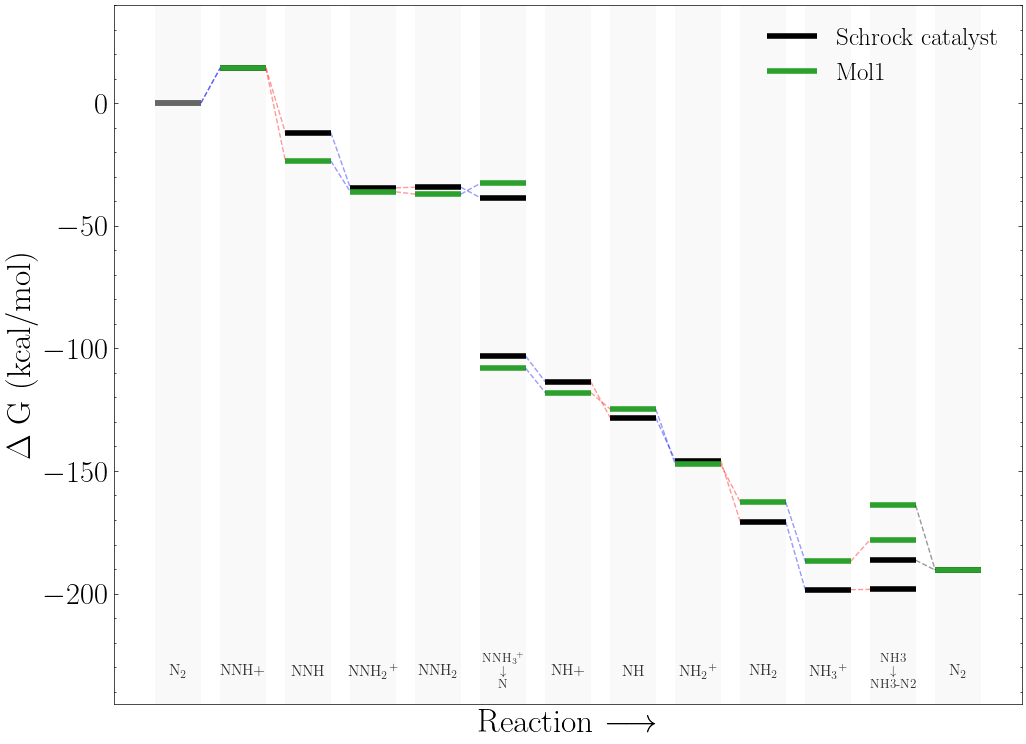

In [11]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/CC(C)(N)CCC1CCCCC1_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol1"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(C)(N)CCC1CCCCC1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1
NH3->N2 : -13.96567478775978
NH3->N2_NH3 : 1.7728243041783571
NH3+->NH3 : 10.334147303830832


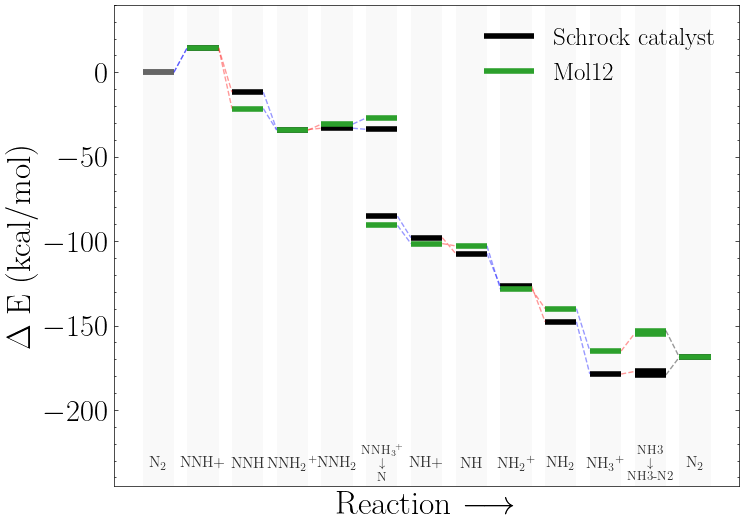

In [10]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/CC(C)(N)CCC1CCCCC1.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCC=Cc1ncnc2ccccc12
NH3->N2 : 3.106401869095862
NH3->N2_NH3 : -3.8553858874365687
NH3+->NH3 : 10.802981940098107


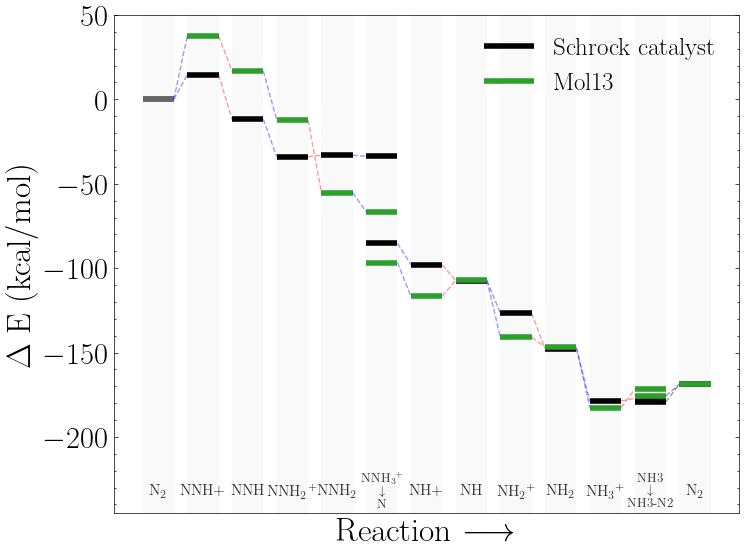

In [46]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate13.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

# Radius profiles

In [ ]:
dict_key = "parts_orca"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

In [ ]:
dict_key = "parts_radius_pbe_noegeo"
dict_key2 = "parts_radius_pbe_noegeo"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key2],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Compared to the reference data

In [ ]:
dict_key = "parts_b3lyp_sp_split"
dict_key2 = "parts_b3lyp_sp_split"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp2.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key2],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)b3lyp_G = collection["paper_b3lyp_reaction_G"]
xtb_thermal = get_xtbreaction_thermal(Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb"))

# Get the reference energy dicts.
dicts = read_parts()
dict_key='parts_orca_b3lyp_sp'

diagrams = [
    [
        base / "schrock/diagrams_schrock/dft/b3lyp_sp",
        "orca.out",
        "FINAL SINGLE",
        dicts[dict_key],
    ],
]
# Get the energy dict
paths = diagrams[0][0].rglob(f"*{diagrams[0][1]}")
energy = get_energies_Mo(paths=paths, pattern=diagrams[0][2])
# Convert to kcal/mol from hartree
energy.update((key, value * HARTREE2KCAL) for key, value in energy.items())
# Get the energy difference dict
b3lyp_own = get_delta_gibbs(energies=energy, reactions=diagrams[0][3])  

print(b3lyp_own)
b3lyp_own = combine_dict_values(b3lyp_own, xtb_thermal)

compare_data = get_diagram_dicts(options)
compare_data["pbe_paper"] = collection["paper_pbe_diagram"]

plot_diagrams(compare_data, options)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NC1(CCCCCl)CCCCC1
NH3->N2 : -11.953359075821936
NH3->N2_NH3 : 77.03906968887895
NH3+->NH3 : 9.43881183071062
lol


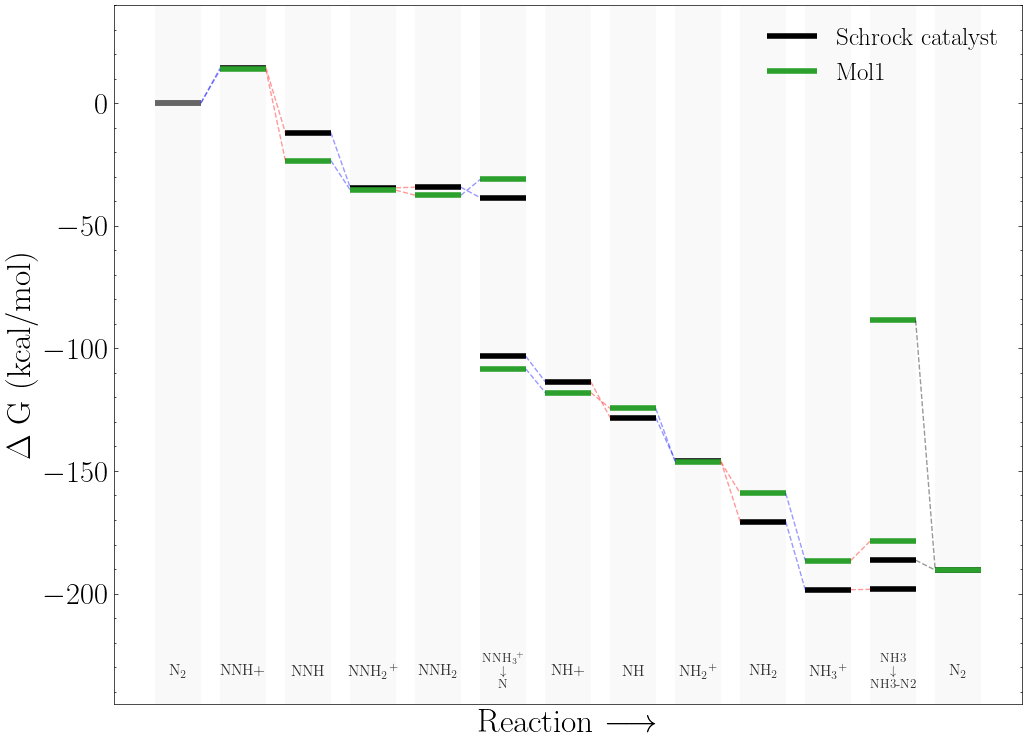

In [54]:
options = {
    "title": f"",
    "ylim": [-245, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/CC(C)(N)CCC1CCCCC1_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol1"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NC1(CCCCCl)CCCCC1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NC1(CCCCCl)CCCCC1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NC1(CCCCCl)CCCCC1
NH3->N2 : -11.953359075821936
NH3->N2_NH3 : 77.03906968887895
NH3+->NH3 : 9.43881183071062


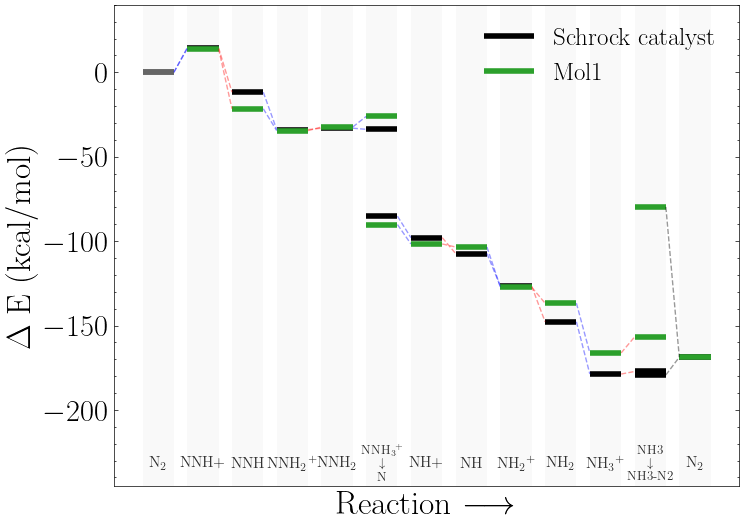

In [55]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/CC(C)(N)CCC1CCCCC1.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

### Compare energies

In [57]:
compare_data,g = get_diagram_dicts_return_gibbs(options)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N
NH3->N2 : -9.27844085264951
NH3->N2_NH3 : 3.490633698645979
NH3+->NH3 : 9.894694034010172
lol


In [58]:
print(compare_data['C=C(C)CC(C)(C)N']['Mo_N2_exchange']-compare_data['C=C(C)CC(C)(C)N']['Mo_NH3'])

-21.012


In [59]:
g

defaultdict(float,
            {'Mo_NNH+': 18.161,
             'Mo_NNH': -39.054,
             'Mo_NNH2+': -21.043,
             'Mo_NNH2': 11.554,
             'Mo_NNH3+': 10.094999999999999,
             'Mo_N': -88.114,
             'Mo_NH+': -17.892,
             'Mo_NH': -1.575,
             'Mo_NH2+': -25.167,
             'Mo_NH2': -8.258000000000001,
             'Mo_NH3+': -32.035000000000004,
             'Mo_NH3': 9.786999999999999,
             'Mo_N2_NH3': 15.339,
             'Mo': -3.66,
             'Mo_N2_bare': -5.611000000000001,
             'Mo_N2_exchange': -24.611})

In [60]:
g

defaultdict(float,
            {'Mo_NNH+': 18.161,
             'Mo_NNH': -39.054,
             'Mo_NNH2+': -21.043,
             'Mo_NNH2': 11.554,
             'Mo_NNH3+': 10.094999999999999,
             'Mo_N': -88.114,
             'Mo_NH+': -17.892,
             'Mo_NH': -1.575,
             'Mo_NH2+': -25.167,
             'Mo_NH2': -8.258000000000001,
             'Mo_NH3+': -32.035000000000004,
             'Mo_NH3': 9.786999999999999,
             'Mo_N2_NH3': 15.339,
             'Mo': -3.66,
             'Mo_N2_bare': -5.611000000000001,
             'Mo_N2_exchange': -24.611})

In [61]:
options_ref = {
            "exchange": True,
            "thermal_correction": True,
            'diagrams': [
                [
                    base / "schrock/diagrams_schrock/dft/b3lyp_sp",
                    "orca.out",
                    "FINAL SINGLE",
                    dicts["parts_orca_b3lyp_sp"],
                    Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
                ],
            ]
        }


options_ref = defaultdict(lambda: False, options_ref)
compare_data_ref, delta_gibbs_ref = get_diagram_dicts_return_gibbs(options_ref)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol


In [62]:
delta_gibbs_ref

defaultdict(float,
            {'Mo_NNH+': 14.479,
             'Mo_NNH': -26.532999999999998,
             'Mo_NNH2+': -25.923000000000002,
             'Mo_NNH2': 3.6790000000000003,
             'Mo_NNH3+': -4.299,
             'Mo_N': -68.278,
             'Mo_NH+': -10.422,
             'Mo_NH': -14.702000000000002,
             'Mo_NH2+': -17.426,
             'Mo_NH2': -24.896,
             'Mo_NH3+': -27.732,
             'Mo_NH3': 0.13000000000000012,
             'Mo_N2_NH3': 11.878,
             'Mo': 20.637,
             'Mo_N2_bare': -12.776,
             'Mo_N2_exchange': -4.0169999999999995})

In [65]:
d3

{'Mo_NNH+': 3.682000000000002,
 'Mo_NNH': -12.521000000000004,
 'Mo_NNH2+': 4.880000000000003,
 'Mo_NNH2': 7.875,
 'Mo_NNH3+': 14.393999999999998,
 'Mo_N': -19.836,
 'Mo_NH+': -7.469999999999999,
 'Mo_NH': 13.127000000000002,
 'Mo_NH2+': -7.741000000000003,
 'Mo_NH2': 16.637999999999998,
 'Mo_NH3+': -4.303000000000004,
 'Mo_NH3': 9.656999999999998,
 'Mo_N2_NH3': 3.4610000000000003}